Here we have the morality data for mortality from the World happiness report. 

Source: https://www.kaggle.com/johnharshith/world-happiness-report-2021-worldwide-mortality

Here, we will investigate the links between covid mortality and these other variables

SARS countries are China, Hong Kong, Canada, Vietnam, Singapore and Taiwan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Taylor\\Documents\\ProgramsAndScripts\\DataSets\\WHRData2021.csv')

In [3]:
df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df)

166

In [5]:
df.isna().sum()

Country name                                                                     0
Population 2020                                                                  2
Population 2019                                                                  2
COVID-19 deaths per 100,000 population in 2020                                   3
Median age                                                                       3
Island                                                                           0
Index of exposure to COVID-19  infections in other countries as of March 31      2
Log of average distance to SARS countries                                        2
WHO Western Pacific Region                                                       0
Female head of government                                                        0
Index of institutional trust                                                     1
Gini coefficient of income                                                       2
All-

Clearly, there is some missing data here. Essentially every data field we would need to compare death counts across years is missing so we can't see how many more deaths we had in 2020 relative to other other years. Instead of doing this, we will be looking at the other bits of the data. We will also check to see if the Items missing median age and island are the same ones missing the other bits of data.

In [8]:
labels = ['All-cause death count, 2017','All-cause death count, 2018','All-cause death count, 2019','All-cause death count, 2020','Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average']
df.drop(labels = labels, axis = 'columns',inplace = True)
df.isna().sum()

Country name                                                                   0
Population 2020                                                                2
Population 2019                                                                2
COVID-19 deaths per 100,000 population in 2020                                 3
Median age                                                                     3
Island                                                                         0
Index of exposure to COVID-19  infections in other countries as of March 31    2
Log of average distance to SARS countries                                      2
WHO Western Pacific Region                                                     0
Female head of government                                                      0
Index of institutional trust                                                   1
Gini coefficient of income                                                     2
dtype: int64

In [9]:
df[df['Median age'].isna()]

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
157,Turkmenistan,5942089.0,5942089.0,NaN,NaN,0,1.463,8.735,0,0,0.511,26.5
163,Somaliland region,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN
164,North Cyprus,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0.305,NaN


Importantly, we are missing here the Covid deaths per 100,000. This might mean that there are no recorded deaths or that this source lacked the information. In any case, while we might be able to fill in some of this information by finding other sources, we don't want to mix and match our sources for this project. Therefore, we are going to drop these nations.

In [11]:
labels = [157,163,164]
df.drop(labels = labels, axis = 'index', inplace = True)
df.isna().sum()

Country name                                                                   0
Population 2020                                                                0
Population 2019                                                                0
COVID-19 deaths per 100,000 population in 2020                                 0
Median age                                                                     0
Island                                                                         0
Index of exposure to COVID-19  infections in other countries as of March 31    0
Log of average distance to SARS countries                                      0
WHO Western Pacific Region                                                     0
Female head of government                                                      0
Index of institutional trust                                                   0
Gini coefficient of income                                                     0
dtype: int64

Now we aren't missing anything. 

First we will sort this by COVID deaths per 100,000 in 2020 to see which nations were most affected by the pandemic. We will then show these results in a vertical bar chart.

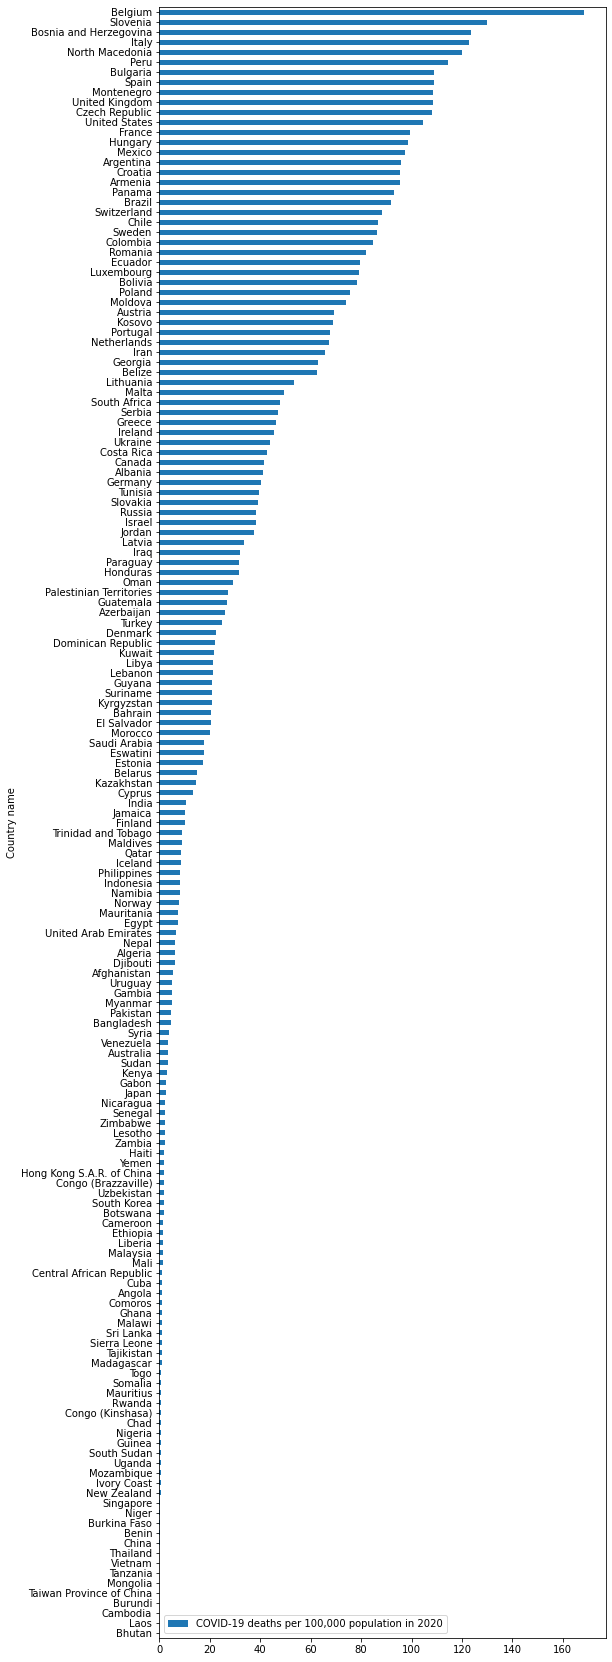

In [20]:
df.sort_values(by = 'COVID-19 deaths per 100,000 population in 2020', ascending = True).plot(figsize = (8,30),kind = 'barh',x = 'Country name', y = 'COVID-19 deaths per 100,000 population in 2020')
plt.show()

One large issue with this data is thatit is likely true that this data only includes confirmed Covid cases rather than an estimate of Covid deaths. This is reasonable but is going to result in some inaccurate measures of nations with poor testing infrasturcture or who are inaccurately reporting their COVID numbers. A better measure would be excess deaths compared to pre-pandemic times, but we don't have that (in fact we just dropped those rows because they didn't have any data).

A good start here is going to be to look at a pairplot to check the different correlations between the numberic variables. We actually don't need both Population 2020 and 2019 as they give us the same information

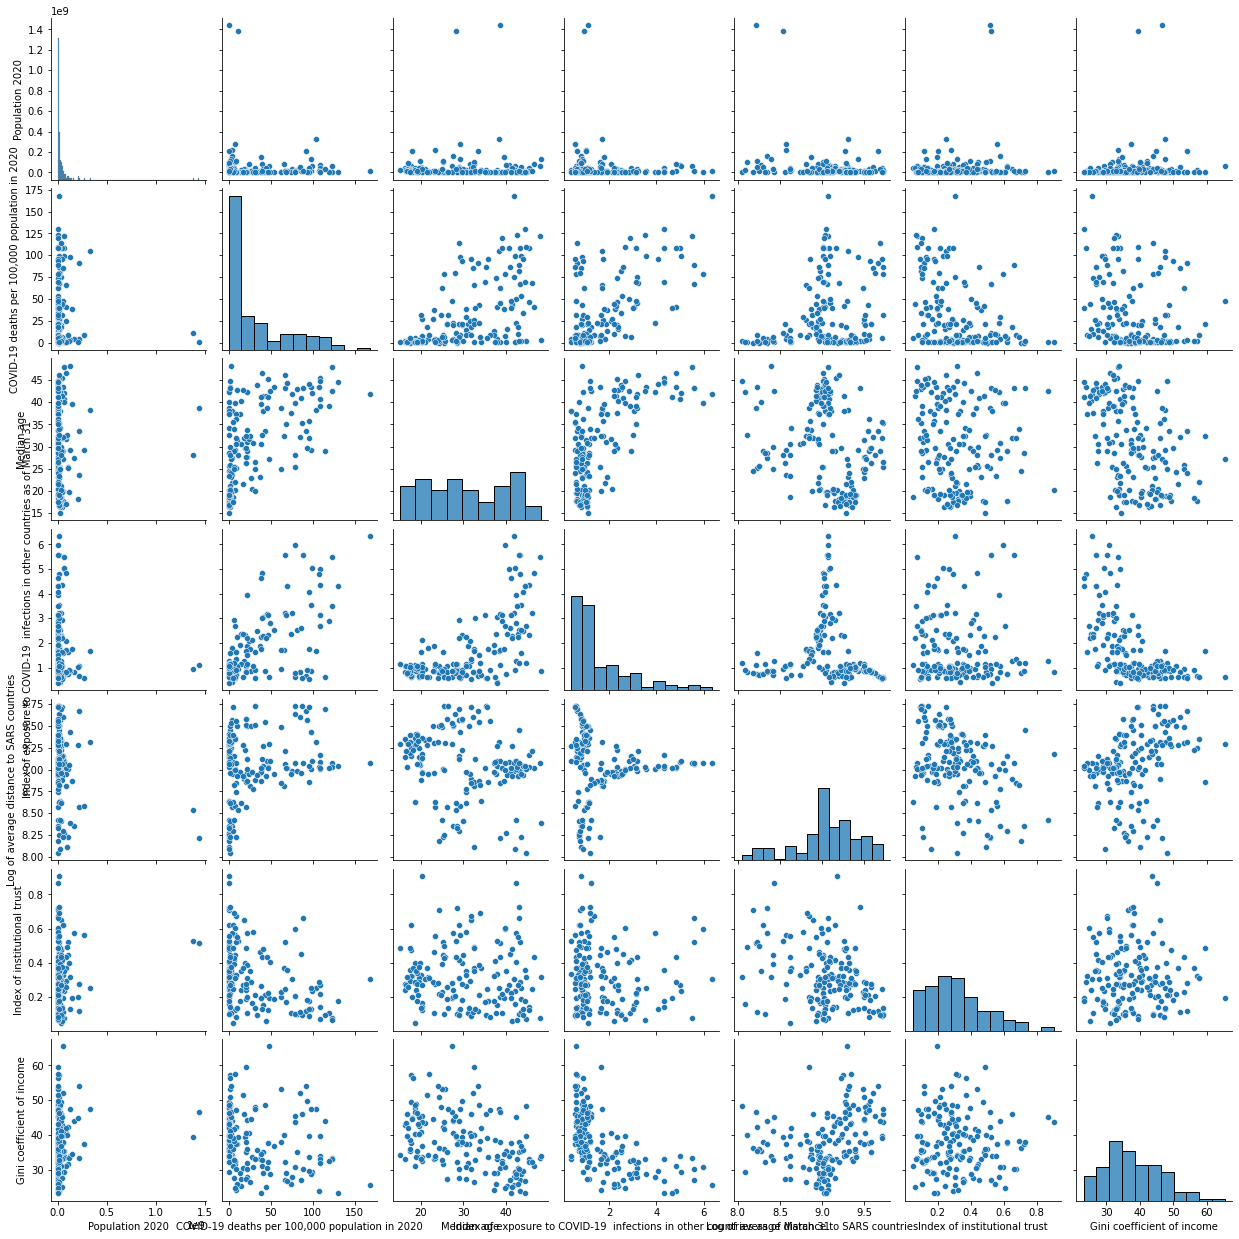

In [25]:
labels = ['Population 2020', 'COVID-19 deaths per 100,000 population in 2020', 'Median age', 'Index of exposure to COVID-19  infections in other countries as of March 31', 'Log of average distance to SARS countries', 'Index of institutional trust', 'Gini coefficient of income']
sns.pairplot(data = df, vars = labels)

Maybe the most interesting line to see here is Covid deaths per 100,000. Gini Coeffecient has little to no effect on deaths. INstitutional Trust is probably the clearest variable to have prevent deaths. This makes sense. High institutional trust means that people are more willing to tolerate and go along with Covid prevention measures. On the other hand, median age, index of exposure, and log of distance to SARS countries are all associated with higher Covid deaths. None of these associations are particularly shocking. Older people are more affected by the disease, being more exposed to infected nations likely lead to higher infections, and nations closer to SARS nations were likely better prepared for pandemics. 

There are some other correlations worht pointing out here. Both MEdian age and Log average distance to SARS countries correlate with the index of exposure. Median age and index of exposure have what is almost an exponential relationship while log average distance and index of exposure have almost a logarithmic relationship. 

At this point, we should see how the categorical variables (Island, Female Head of State and WHO Western Pacific Region) affect our associations

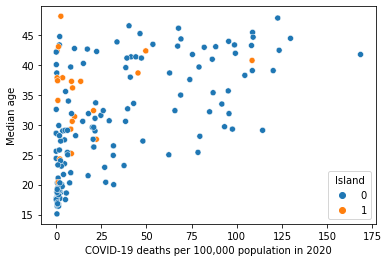

In [26]:
sns.scatterplot(data = df, x = 'COVID-19 deaths per 100,000 population in 2020', y = 'Median age', hue = 'Island')
plt.show()

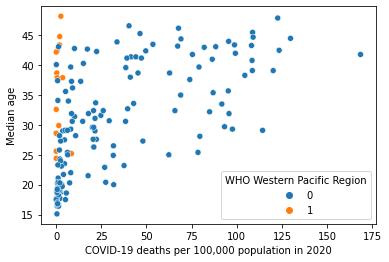

In [27]:
sns.scatterplot(data = df, x = 'COVID-19 deaths per 100,000 population in 2020', y = 'Median age', hue = 'WHO Western Pacific Region')
plt.show()

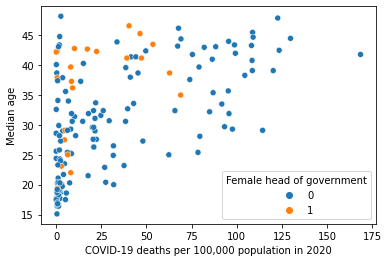

In [28]:
sns.scatterplot(data = df, x = 'COVID-19 deaths per 100,000 population in 2020', y = 'Median age', hue = 'Female head of government')
plt.show()

One can probably assert, based on this data, that being in the WHO Western Pacific Region is negatively associated with increased Covid deaths. Being an Island nation is also mostly negatively assocated with increased covid deaths (though there are a few prmenient outliers). Having a female head of state is maybe somewhat associated with more Covid deaths, but its not a very strong association.

As previously stated, the data here is likely incomplete due to testing infrastructure and the gender of the statesman has no sensible link to number of people dead due to Covid.

As an interesting excercise, we will try clustering the data.

In [34]:
df_wo_name = df.drop(labels = 'Country name',axis = 'columns')
df_wo_name.head()

,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
0,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51
1,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56
2,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55
3,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83
4,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_wo_name)

df_scaled = pd.DataFrame(scaled_data,columns=df_wo_name.columns)

df_scaled.head()

,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
0,0.229788,0.234642,0.619902,0.700906,0.0,0.219484,0.755648,0.0,0.0,0.237209,0.575712
1,0.070879,0.071583,0.044256,0.308157,0.0,0.209256,0.572533,0.0,0.0,0.465116,0.197982
2,0.025413,0.025842,0.118792,0.438066,0.0,0.328135,0.702735,0.0,0.0,0.408140,0.387202
3,0.004506,0.004648,0.127647,0.483384,0.0,0.253521,0.542212,0.0,0.0,0.070930,0.204376
4,0.023956,0.024265,0.106086,0.507553,0.0,0.146043,0.507134,0.0,0.0,0.703488,0.537583


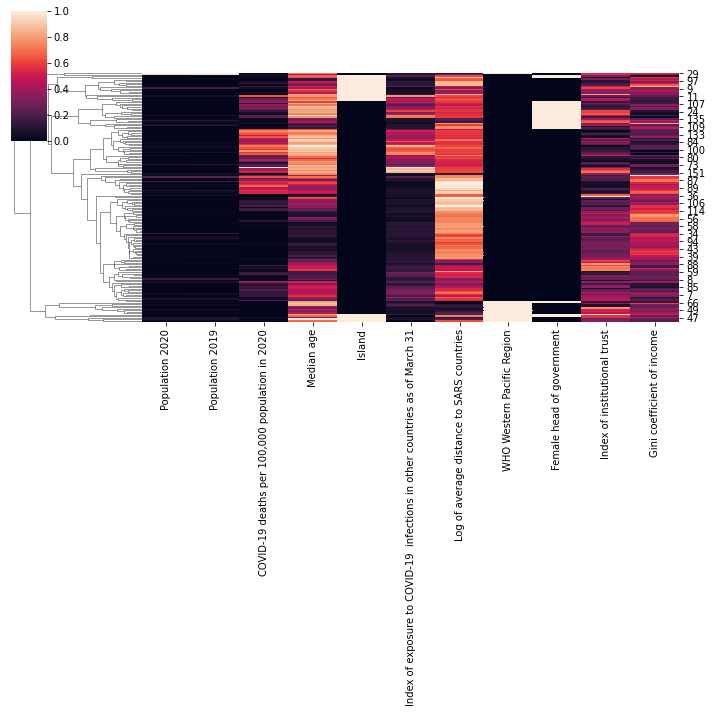

In [37]:
sns.clustermap(data = df_scaled, col_cluster = False)
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

cluster_labels = model.fit_predict(df_scaled)
cluster_labels

array([ 87, 109,  91,  95, 113, 161, 133, 115,  88, 107, 122, 135, 130,
        89, 111, 159, 136,  83, 131, 153, 102, 120, 147, 106,  92, 149,
       119, 143,  97,  84,  96, 104,  93, 121, 105, 150,  99, 125,  74,
       148, 160,  73, 114, 155,  90, 100, 132, 127, 128, 101,  85, 117,
       129,  86,  81, 138, 124, 112, 154,  41,  56, 151,  42, 142,  79,
        43,  60, 152, 156,  44,  63,  94, 108,  47,  59,  77, 162,  80,
       157,  20, 123, 145,  64,  50,  98, 116,  75, 126, 139, 134,  57,
        66,  21, 103,  39,  51, 141,  82,  76, 158, 137,  61, 110, 118,
        54,  65,  37,  78, 140,  29, 144,  58,  69,  40,  55,  36, 146,
        70,  28,  71,  62,  34,  32,  27,  48,  72,  67,  68,  52,  49,
        53,  19,  38,  35,  45,  30,  26,  33,  14,  25,  23,  13,  46,
         6,  24,  31,  22,  17,  16,  12,  10,   9,  11,  15,   7,  18,
         8,   5,   4,   2,   3,   1,   0], dtype=int64)

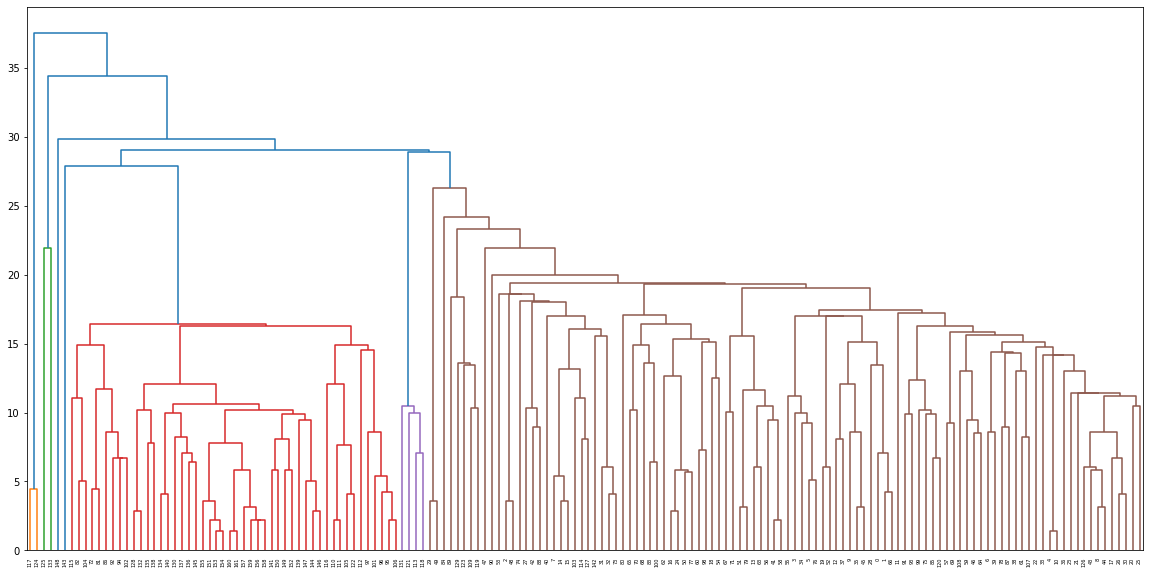

In [40]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(model.children_)

plt.figure(figsize = (20,10))
dn = hierarchy.dendrogram(linkage_matrix)

This Dendrogram shows us that there are roughly 5 broad classes, so we will make a new model with that in mind.

In [41]:
model = AgglomerativeClustering(n_clusters=5)

cluster_labels = model.fit_predict(df_scaled)
cluster_labels

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 3, 2, 2, 4, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 3, 1, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 4, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 4, 0, 0, 3, 4, 4, 0, 4, 0, 0, 1, 1, 1,
       0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 0, 0, 1, 3, 3, 2, 4, 4, 4,
       2, 3, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 1, 1, 3, 0, 0, 0, 0, 3, 0, 0,
       1, 4, 3, 0, 0, 0, 0, 1, 0], dtype=int64)

In [43]:
df['Cluster Lables'] = cluster_labels
df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,Cluster Lables
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,3
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,0
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,0
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,0
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,0


We should see how nations are clustered together on a map so its easy to visualize

In [45]:
iso = pd.read_csv('C:/Users/Taylor/Documents/ProgramsAndScripts/MLandDSMasterClass/DATA/country_iso_codes.csv')
iso.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [56]:
dfnl = df[['Country name','Cluster Lables','COVID-19 deaths per 100,000 population in 2020']].copy()
dfnl.rename(columns = {'Country name':'Country'},inplace = True)
dfnl.head()

,Country,Cluster Lables,"COVID-19 deaths per 100,000 population in 2020"
0,United States,3,104.451
1,Egypt,0,7.457
2,Morocco,0,20.016
3,Lebanon,0,21.508
4,Saudi Arabia,0,17.875


In [57]:
dfiso = pd.merge(dfnl,iso,how = 'inner',on = 'Country')
dfiso.head()

,Country,Cluster Lables,"COVID-19 deaths per 100,000 population in 2020",ISO Code
0,United States,3,104.451,USA
1,Egypt,0,7.457,EGY
2,Morocco,0,20.016,MAR
3,Lebanon,0,21.508,LBN
4,Saudi Arabia,0,17.875,SAU


In [54]:
import plotly.express as px

In [58]:
fig = px.choropleth(dfiso, locations='ISO Code',
                    color='Cluster Lables', 
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [59]:
fig = px.choropleth(dfiso, locations='ISO Code',
                    color='COVID-19 deaths per 100,000 population in 2020', 
                    hover_name='Country', # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Maybe a little disappointingly, our Clusters weren't very closely associated with Covid deaths. In fact, it seems like Covid deaths were a relatively minor factor. Being an island was a much more important factor in the clustering specifically for group 4. WHO region was probably critical in creating group 2. Groups zero and 3 are probably closely related to Gini Coeficient or perhaps median age. Group 1 was probably determined by high institutional trust.